## Gaussian beam tracing in CodeV

The Gaussian beam trace (BEA) implemented in CodeV appears to be similar to the OpTaliX "Bea", it is not however, because it allows for <u> Gaussian beams with general astigmatism </u>.

### Bea:
See the note in the Code V manual: 

"Use the Gaussian Beam Trace (BEA) option when you want to determine the waist locations and sizes along chief rays in your optical system for unclipped Gaussian beams in the reference wavelength. Astigmatism and field curvature are included, but no other aberrations. This option <u> applies to any system regardless of symmetry </u>. It is most useful for systems containing narrow, slow beams where geometrical optics does not adequately predict the positions and sizes of the beam at the focus. In systems of this type, the focused spot is often similar in size to the beam diameter. A typical use would be to analyze a laser scanning system.

How is the computation performed?:

"Gaussian Beam Trace (BEA) propagates an untruncated Gaussian beam through the system. Since the only aberration accounted for is the local astigmatism of the beam, the beam profile remains Gaussian although the diameter, elliptical ratio and orientation may change from point to point. 
The beam is propagated along the chief ray, using close skew rays to determine the local astigmatism. Tilts, decenters, and non-spherical surface shapes are all accounted for properly. The mathematical method used is a generalized 4 x 4 ABCD matrix described in “Gaussian Light Beams with General Astigmatism,” Arnaud and Kogelnik, Applied Optics, Vol. 8, No. 8, 1969 and “Matrix Theory of Light Beam Waveguides,” Suematsu and Fukinuki, Bull. Tokyo Inst. Tech, Number 88, 1968."

The applicability of this feature appears to be similar to Gaussian beam raytracing in KDP-2. 
    "

#### A simple example of a focused laser beam:
All examples are taken from the CodeV help.

In [48]:
import os

def wl(file, L):
    """
    Function for writing a line in a file.
    """   
    file.writelines(L)
    file.write("\n") 
    
filename = "simp_foc_lens.seq"      # name of the .seq file to be written using python
f = open(os.path.join(r"C:\Users\herbst\CVUSER", filename),"w")

# wl(f, [''])
wl(f, ['! execute in CodeV with: in '+str(filename)])
wl(f, ['! this file should be located in CVUSER folder or macro folder, then use: in cv_macro:'+str(filename)])
wl(f, [''])
wl(f, ['! lens is focusing collimated light. This is how one would normally set up a focusing lens if one were not concerned with the effects of slow f-numbers.'])
wl(f, [''])
wl(f, ['RDM                      !Radius input mode'])
wl(f, ['LENS'])
wl(f, ["TITLE 'FOCUSING LENS'"])
wl(f, ['dim m                    ! dimensions are in mm'])
wl(f, ['WL 632.8                 ! HeNe wavelength'])
wl(f, ['EPD 1                    ! laser beam diameter of 1 mm'])
wl(f, ['S 500 1 BK7              ! first surface of plane convex lens; radius of curvature: 0.5 m'])
wl(f, ['STO                      ! This surface is the aperture stop'])
wl(f, ['S 0 0                    ! Second surface of lens'])
wl(f, ['PIM                      ! Image at paraxial image distance'])
wl(f, ['GO'])

wl(f, [''])
wl(f, ['! now change the setup and perform BEA:'])
wl(f, [''])

wl(f, ['PIM  NO                  ! delete the PIM solve: Could be done with DEL PIM'])
wl(f, ['THI  S0  50              ! The laser is located 50 mm away from the lens'])
wl(f, ['BEA                      ! Enter the BEA option'])
wl(f, ['WRY  0.5                 ! The laser beam is 1.0 mm diameter'])
wl(f, ['GO'])




In [49]:
wl(f, [''])
wl(f, ['! see the image size at this waist :'])
wl(f, [''])

wl(f, ['TIN SI-1 -363.2743       ! move image plane to waist location: TIN is Thickness INcrement '])
wl(f, ['BEA'])
wl(f, ['WRY 0.5'])
wl(f, ['GO'])

f.close()

#### Example 3: Tilted anamorphic system
--> shows general astigmatism in an optical system

In [50]:
filename = "tilt_anamorph_sys.seq"      # name of the .seq file to be written using python
f = open(os.path.join(r"C:\Users\herbst\CVUSER", filename),"w")

# wl(f, [''])
wl(f, ['! execute in CodeV with: in '+str(filename)])
wl(f, ['! this file should be located in CVUSER folder or macro folder, then use: in cv_macro:'+str(filename)])
wl(f, [''])
wl(f, ['!  '])
wl(f, [''])

wl(f, ['LENS'])
wl(f, ["TITLE  'Rotated  Cylinders'"])
wl(f, ['dim m                    ! dimensions are in mm'])
wl(f, ['WL 632.8                 ! HeNe wavelength'])
wl(f, ['EPD 1                    ! laser beam diameter of 1 mm'])

wl(f, [''])

wl(f, ['SO   0.    500.'])
wl(f, ['S1  128.772   0.  BK7    ! fast input mode S: radius of curvature, thickness, glass']) 
wl(f, ['sto'])
wl(f, ['cyl                      ! cylinder lens'])
wl(f, ['S2   0.    500.'])
wl(f, ['S3  103.018   0.  BK7'])
wl(f, ['CYL'])
wl(f, ['CDE  45                  ! rotation by 45°'])
wl(f, ['DAR                      ! Decenter and Return (DAR) surface'])
wl(f, ['S4   0.  100.'])
wl(f, ['S5   0.  100.'])
wl(f, ['S6   0.  100.'])
wl(f, ['S7   0.  100.'])
wl(f, ['S8   0.  100.'])
wl(f, ['S9   0.  100.'])
wl(f, ['S4   0.  100.'])

wl(f, ["REX s1 100.            ! apply rectangular apertures to make the lenses visible in layout plot"])
wl(f, ["REY s1 100."])
wl(f, ["REX s3 100.            ! apply rectangular apertures to make the lenses visible in layout plot"])
wl(f, ["REY s3 100."])

wl(f, ['GO'])

wl(f, [''])

wl(f, ['BEA                      ! Enter the BEA option'])
wl(f, ['WRY  0.1                 ! The laser beam waist diameter is 0.2 mm '])
wl(f, ['GO'])



The built up optical system looks like this in CodeV: 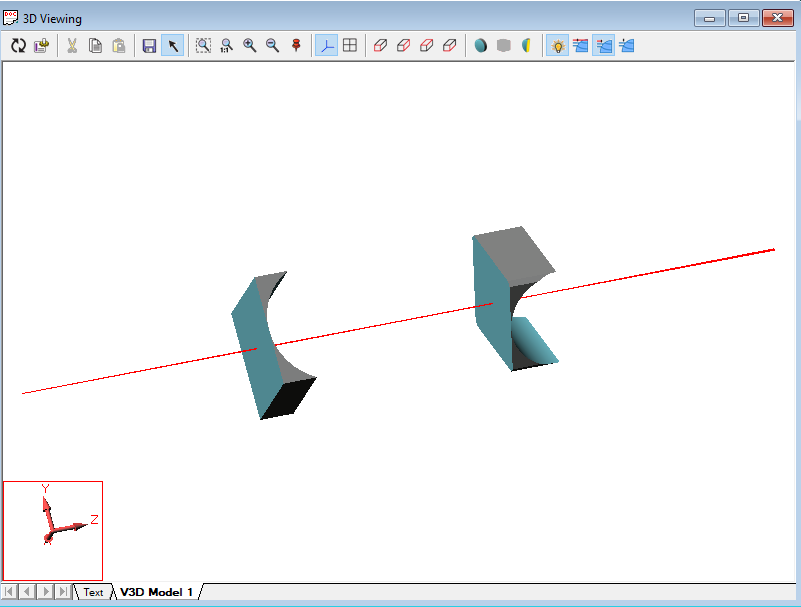
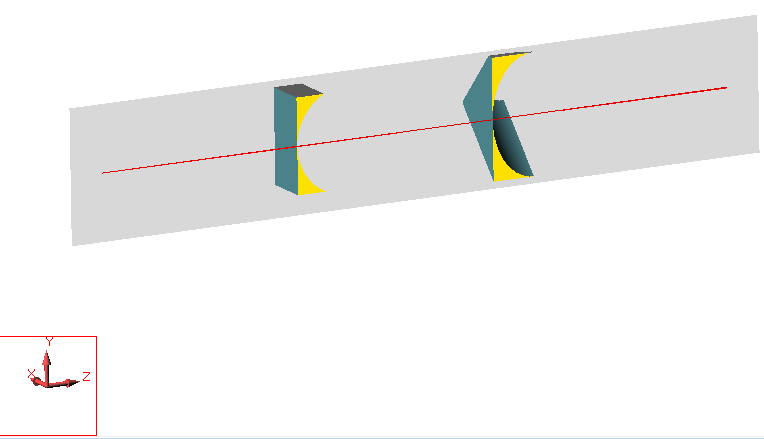

Why does the beam orientation change after 5? Can this be visualized within CodeV?

In [51]:
wl(f, ['bea;wry 0.1;dis;go'])

f.close()

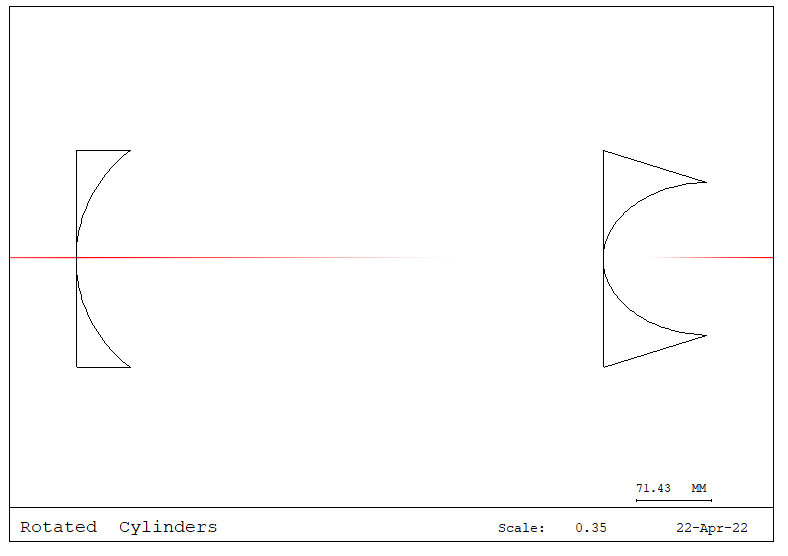

Not really nice to see in yz-section.